In [44]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Path to the file | Ruta al archivo

data_folder = Path(".") / "C:/Users/Usuario/Mi unidad/Proy.gbif/Arboles_exoticos"

*Decidi usar parte de los datos de mi tesis con plantas exoticas, ciudades y migraciones. 

In [45]:
# Open the file | Abrimos el archivo

data = pd.read_csv(data_folder / "paises.csv")

#####Tengo datos de especies exoticas (arboles) los cuales asocio a datos socioeconomicos

In [46]:
data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,layer,...,agemean,ntl00mean,ntl21mean,ntl_dif,tempmean,precipanua,imn_p,ntltrendme,ntl_count,ntl_hab
0,53,COL,Colombia,5,Bolívar,Departamento,NaN,NaN,NaN,paises,...,1619.973614,1.695438,4.554213,2.859,26.015496,2505.187900,0.058550,0.191928,1015.0,0
1,249,VEN,Venezuela,1,Bolivar,NaN,NaN,NaN,NaN,VEN_adm1,...,1779.857369,0.250338,0.822698,0.572,24.282914,2455.138818,0.026331,0.072592,1123.0,0
2,178,PER,Peru,5,Ayacucho,Región,NaN,NaN,NaN,paises,...,1556.978245,0.109278,2.169299,2.060,8.650960,1002.175370,0.047267,0.128648,210.0,0
3,178,PER,Peru,10,Huancavelica,Región,NaN,NaN,NaN,paises,...,1568.948021,0.186797,2.692946,2.506,6.676853,1272.067247,0.028732,0.173301,62.0,0
4,178,PER,Peru,11,Ica,Región,NaN,NaN,NaN,paises,...,1564.982763,1.261517,3.717408,2.456,18.913940,126.253626,0.115442,0.150598,1010.0,0


*Elijo las columnas de proporcion de exoticas, temperatura media entre 1980-2010, paises nombre, 
precipitaciones anuales y fecha de fundacion promedio*

In [72]:
df = data.loc[1:117,["proporcion", "tempmean", "NAME_0", "precipanua", "agemean"]]

In [73]:
df.isnull().values.any()

True

In [74]:
df = df.dropna()

df.shape

(115, 5)

In [75]:
df[df.duplicated()]

,proporcion,tempmean,NAME_0,precipanua,agemean


In [76]:
df = df.drop_duplicates()

df.shape

(115, 5)

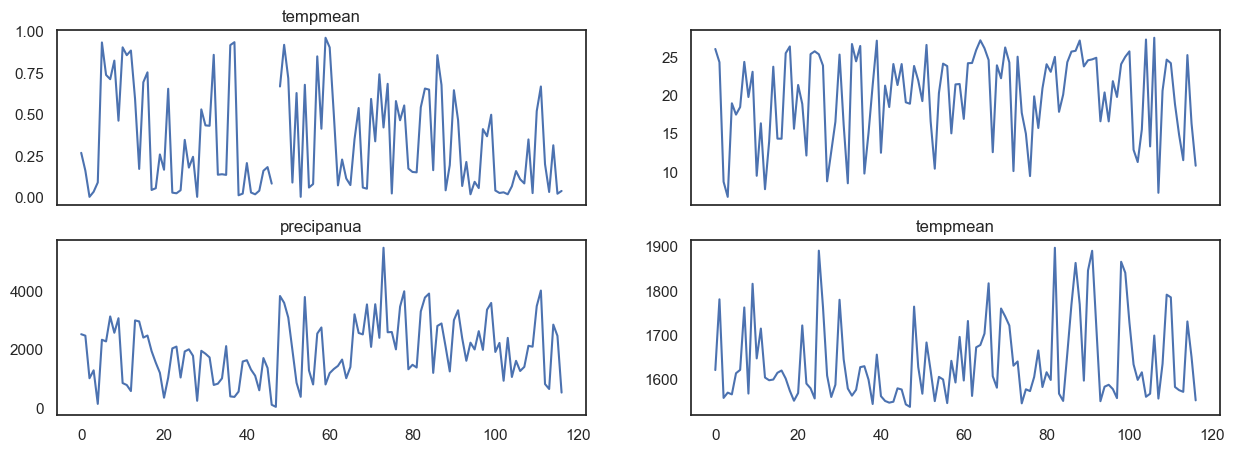

In [77]:
names = ["proporcion" , "tempmean", "precipanua", "agemean"]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 5))

data[names[0]].plot(ax=axes[0, 0])
axes[0,0].set_title(names[0])

data[names[1]].plot(ax=axes[0, 1])
axes[0,0].set_title(names[1])

data[names[2]].plot(ax=axes[1, 0])
axes[1,0].set_title(names[2])

data[names[3]].plot(ax=axes[1, 1])
axes[1,1].set_title(names[1])
plt.show()

In [78]:
paises = df.groupby('NAME_0')

print(paises)

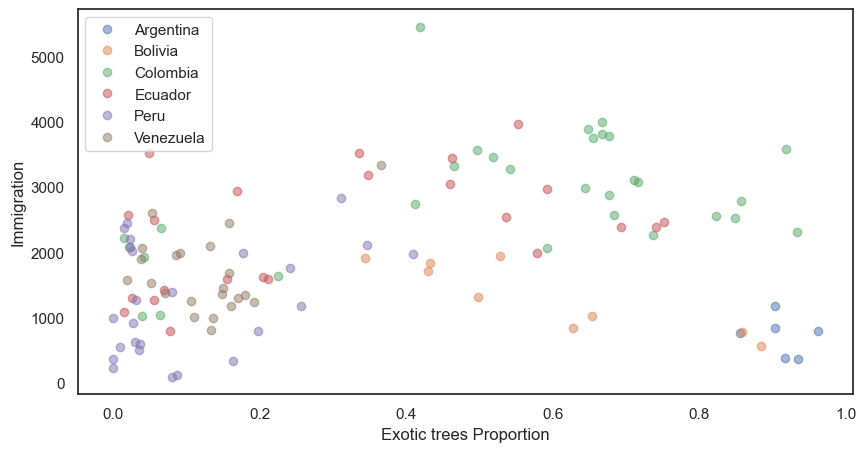

In [79]:
fig = plt.figure(figsize=(10,5))

for name, group in paises:
    plt.plot(
        group["proporcion"], 
        group["precipanua"], 
        marker='o', 
        linestyle='',
        ms=6, 
        label=name, 
        alpha=0.5       # transparency / trasparencia
    )

#ax.legend(loc=1)
plt.legend()
plt.xlabel('Exotic trees Proportion', size=12)
plt.ylabel('Immigration', size=12)
plt.show()

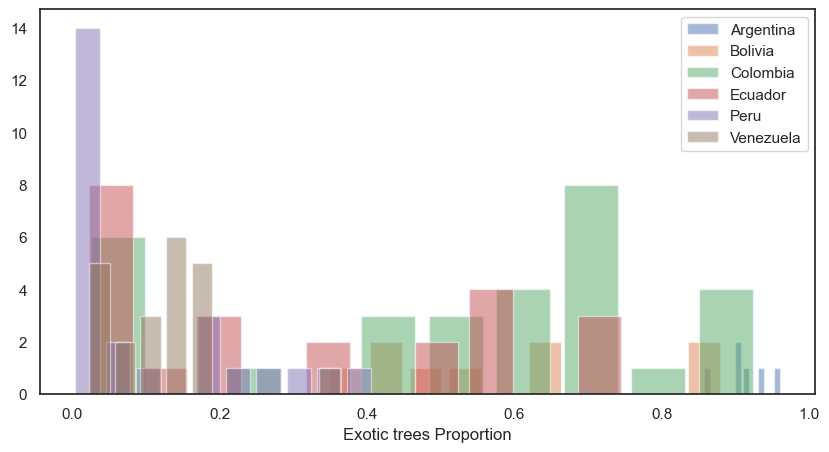

In [80]:
fig = plt.figure(figsize=(10,5))

for name, group in paises:
    plt.hist(
        group["proporcion"], 
        histtype='bar', 
        stacked=True, 
        rwidth=0.8, 
        alpha=0.5, 
        label=name    # transparency / trasparencia
    )

#ax.legend(loc=1)
plt.legend()
plt.xlabel('Exotic trees Proportion', size=12)
plt.show()